In [1]:
#need this to show matplotlib figures in ipythonn notebook. 
#Switch to AGG for outputting figures
%matplotlib inline
import matplotlib
#matplotlib.use("AGG")
from mpl_toolkits.basemap import Basemap, shiftgrid
import numpy as np
from pylab import *
import numpy.ma as ma
from glob import glob
#import scipy.io.readsav
#from netCDF4 import Dataset

In [3]:
dataPath = '../'
figpath='./Figures/'

In [4]:
flat = open(dataPath+'psn25lats_v3.dat', 'rb')
flon = open(dataPath+'psn25lons_v3.dat', 'rb')
lats = fromfile(file=flat, dtype='<i4')/100000.0
lats = reshape(lats, [448, 304])
lons = fromfile(file=flon, dtype='<i4')/100000.0
lons = reshape(lons, [448, 304])

In [5]:
m = Basemap(projection='npstere',boundinglat=65,lon_0=0, resolution='l'  )
xpts, ypts = m(lons, lats)

In [5]:
! pwd

/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/GRL_Winter_growth_2017


In [6]:
ypts.shape

(448, 304)

In [9]:
#Read freezeonset 
#! ls  MeltFreezeData/melt_update_2017/
f = open('./MeltFreezeData/melt_update_2017/1981730slatefreeze.int.304.448.c','rb')
data = np.fromfile(f, dtype='>u2').reshape(448, 304)
data.shape
#data[0,:]
#136192/304.

(448, 304)

/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


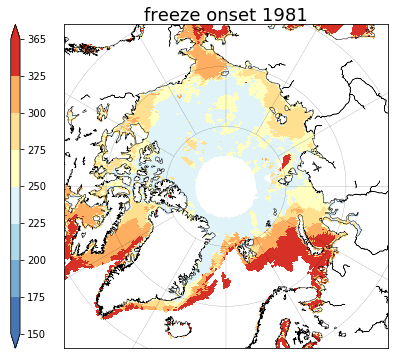

In [10]:
#clevs = [-50,-40,-30,-20,-10,10,20,30,40,50]
clevs = [150,175,200,225,250,275,300,325,365]
x=448
y=304
CSanom_masked = ma.masked_all((x, y),float)
CSanom_masked_1981 = ma.masked_all((x, y),float)
CSanom = data#/125.
#CSanom = np.transpose(data)/125.
CSanom_masked=ma.masked_where(abs(CSanom)>365, CSanom)
CSanom_masked=ma.masked_where(abs(CSanom)<0.0001, CSanom_masked)
plot_12months_clim_color(lons, lats, CSanom_masked, clevs, 'slatfreeze onset 1981', 5, ['freeze onset 1981'])
CSanom_masked_1981=CSanom_masked

In [11]:
#Read freezeonset 
#! ls  MeltFreezeData/melt_update_2017/
f = open('./MeltFreezeData/melt_update_2017/2016730slatefreeze.int.304.448.c','rb')
data = np.fromfile(f, dtype='>u2').reshape(448, 304)
data.shape
#data[0,:]
#136192/304.

(448, 304)

/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


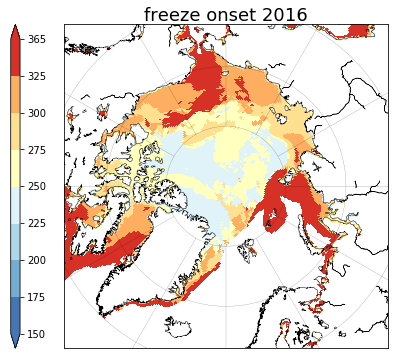

In [12]:
#clevs = [-50,-40,-30,-20,-10,10,20,30,40,50]
clevs = [150,175,200,225,250,275,300,325,365]
x=448
y=304
CSanom_masked = ma.masked_all((x, y),float)
CSanom_masked_2016 = ma.masked_all((x, y),float)
CSanom = data#/125.
#CSanom = np.transpose(data)/125.
CSanom_masked=ma.masked_where(abs(CSanom)>365, CSanom)
CSanom_masked=ma.masked_where(abs(CSanom)<0.0001, CSanom_masked)
plot_12months_clim_color(lons, lats, CSanom_masked, clevs, 'slatfreeze onset 2016', 5, ['freeze onset 2016'])
CSanom_masked_2016=CSanom_masked

In [13]:
x=448
y=304
#CSanom_all_masked = []
CSanom_all_masked = ma.masked_all((30, x, y),float)
for year in range(1981,2011):
    print(year)
    year1 ='%02d' %(year)
    #print(year1)
    f = open('./MeltFreezeData/melt_update_2017/'+year1+'730slatefreeze.int.304.448.c','rb')
    data = np.fromfile(f, dtype='>u2').reshape(448, 304)
    clevs = [150,175,200,225,250,275,300,325,365]
    CSanom_masked = ma.masked_all((x, y),float)
    CSanom = data
    CSanom_masked=ma.masked_where(abs(CSanom)>365, CSanom)
    CSanom_masked=ma.masked_where(abs(CSanom)<0.0001, CSanom_masked)
    CSanom_all_masked[year-1981]=CSanom_masked
    #CSanom_all_masked.append(CSanom_masked)
    #plot_12months_clim_color(lons, lats, CSanom_masked, clevs, 'freeze onset'+year1, 5)




1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010


In [14]:
#Average 1981-2010
CSanom_mean_masked = ma.masked_all((x, y),float)
CSanom_mean_masked = np.mean(CSanom_all_masked,0)
CSanom_mean_masked.shape
CSanom_masked_1981[224,152]
CSanom_mean_masked.shape
CSanom_masked[224,:].shape

(304,)

/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


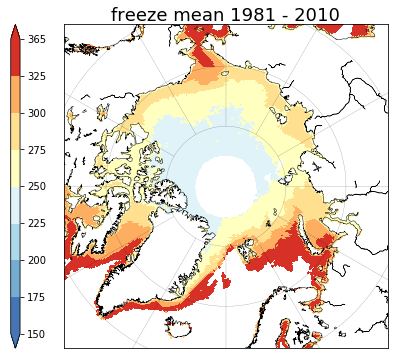

In [15]:
#CSanom_all_masked[29,50,:]
clevs = [150,175,200,225,250,275,300,325,365]
CSanom_mean_masked=ma.masked_where(CSanom_masked_1981>365,CSanom_mean_masked)
plot_12months_clim_color(lons, lats, CSanom_mean_masked, clevs, 'slate freeze mean 1981 - 2010', 5, ['freeze mean 1981 - 2010'])


/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


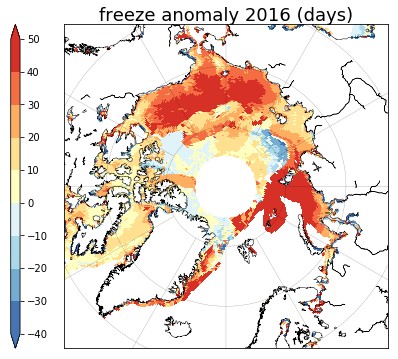

In [16]:
clevs = [-40,-30,-20,-10,0,10,20,30,40,50]
#clevs = [0,10,20,30,40,50,60,70,80,90]
diff = ma.masked_all((x, y),float)
diff = CSanom_masked_2016-CSanom_mean_masked
diff_masked=ma.masked_where(abs(CSanom_masked_1981)>365, diff)
plot_12months_clim_color(lons, lats, diff , clevs, 'slate freeze anomaly 2016', 5,['freeze anomaly 2016 (days)'])
diff[224,152]
savefig('freeze_anomal_2016.png', dpi=450)

In [6]:
##############################################################################################
# Function to print pdf clim
##############################################################################################

def plot_12months_clim_color(TLON, TLAT, var3D, clevs, variable_in, y, title):

        #CHOOSE MAP PROJECTION
        m = Basemap(projection='npaeqd',boundinglat=63,lon_0=360,resolution='l')
        y1 ='%02d' %(2011+y)
#        y1 ='%02d' %(1980+y)

#READ IN LON/LAT AND THEN FIND THE XY COORDINATES IN THE GIVEN BASEMAP PROJECTION ABOVE.
        lons = TLON # var2D[1]
        lats = TLAT # var2D[2]
        xpts,ypts = m(lons,lats)

        fig = figure(figsize=(6.5,5))
        clf()
#        title=['Freeze onset anomaly '+y1]        
#        title=['CICE anomaly April '+y1]
#        title=['free CICE anomaly April '+y1]
#        title=['CS anomaly April '+y1]
#        title=['CICE anomaly dh dyn '+y1]
#        title=['CICE anomaly dh therm '+y1]    
#        title=['Anom FDD 1 Oct -> 15 Apr '+y1]
        subplots_adjust(left=0.05, right=0.95, wspace=0.03, hspace=0.08, bottom=0.05, top=0.95)

        ax1 = subplot(1,1,1)
        text(0.5, 1.01, '%s' %title[0],
        horizontalalignment='center',
        fontsize=18,
        transform = ax1.transAxes)

        cmap = mpl.colors.ListedColormap(['#4575b4','#74add1','#abd9e9','#e0f3f8','#ffffbf','#fee090','#fdae61','#f46d43','#d73027'])
        #cmap = mpl.colors.ListedColormap(['#081D58','#253494','#225EA8','#1D91C0','#41B6C4','#7FCDBB','#C7E9B4','#EDF8B1','#FFFFD9'])
        bounds = clevs
        norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
        im1 = m.pcolormesh(xpts, ypts, var3D, cmap=cmap, norm = norm)#, origin='lower')

#        clevs2 = [20]
#        im2 = m.contour(xpts, ypts, var3D,clevs2,colors='orange')#, cmap=cmap2, norm = norm2)
#        clabel(im2, inline=1, fontsize=5)

        m.drawparallels(np.arange(60,90,10), linewidth = 0.25, linestyle='solid', zorder=8)
        m.drawmeridians(np.arange(0.,360.,30.), linewidth = 0.25, zorder=8)
        m.drawcoastlines(linewidth=0.5)

        cax1 = fig.add_axes([0.04, 0.05, 0.02, 0.9])
        cbar1 = colorbar(im1,cax=cax1,orientation='vertical', extend='both')
        cbar1.set_ticks(clevs)

        savepath = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/GRL_Winter_growth_2017/Figs/'
        #savepath = '/Users/mct/Documents/WORK/PAPERS/Paper_Growth2017/Python/Figs/'
        savefig(savepath + variable_in + '_' + y1 + '.png', format='png', dpi=300)
        #savefig(savepath + variable_in + '/' + variable_in + '_' + rundir_name_in + '_' + month1 + '.pdf')